In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('total.csv')
rationales = df[['if_else', 'contrastive', 'neutral', 'consensus', 'causal', 'comparative', 'historical', 'ucs_score', 'wucs_score', 'consensus_wucs_score']]

In [84]:
results = pd.read_csv('results2.csv', index_col=0)

In [85]:
results

,IF - ELSE,Contrastive,Neutral,Consensus,Causal,Comparative,Historical,UCS,WUCS,CWUCS
ACCURACY,61.14,60.92,62.48,63.07,61.53,61.30,61.94,61.27,61.84,63.48
BASE,56.24,68.26,11.12,68.43,63.92,64.20,0.11,0.04,62.94,9.00
LARGE,29.87,70.20,40.98,74.01,69.84,71.21,36.18,66.32,57.20,6.00


In [93]:
results['Causal']['ACCURACY']

61.53

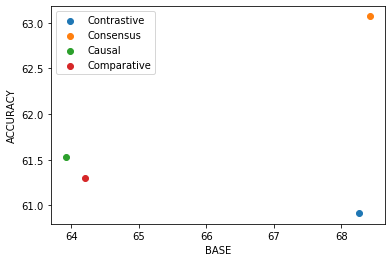

In [96]:
# plot all performance rationales greater than accuracy
columns = results.columns
for col in columns:
    if results[col]['BASE'] > results[col]['ACCURACY'] and results[col]['LARGE'] > results[col]['ACCURACY']:
        plt.scatter(results[col]['BASE'], results[col]['ACCURACY'], label=col)
plt.xlabel('BASE')
plt.ylabel('ACCURACY')
plt.legend()

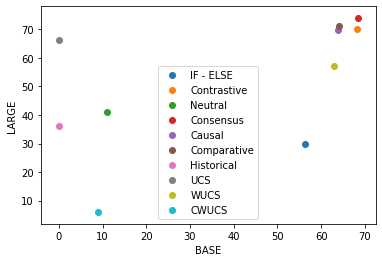

In [98]:
# PLOT PERFORMANCE RATIONALES LARGE AND BASE
columns = results.columns
for col in columns:
    plt.scatter(results[col]['BASE'], results[col]['LARGE'], label=col)

plt.xlabel('BASE')
plt.ylabel('LARGE')
plt.legend()

# Length analysis

In [102]:
# top 4 performance rationales
best_rationales = []
columns = results.columns
for col in columns:
    if results[col]['BASE'] > results[col]['ACCURACY'] and results[col]['LARGE'] > results[col]['ACCURACY']:
        best_rationales.append(col.lower())


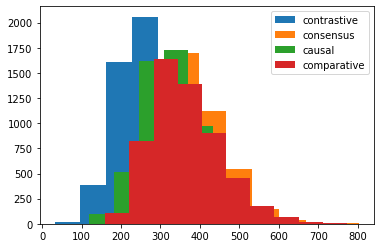

In [120]:
# plot length of top performance 
length_dict = {}
for rationale in best_rationales:
    
    length_dict[rationale] = rationales[rationale].str.len()
    
    plt.hist(length_dict[rationale], label=rationale)
plt.legend()


## Just mean length

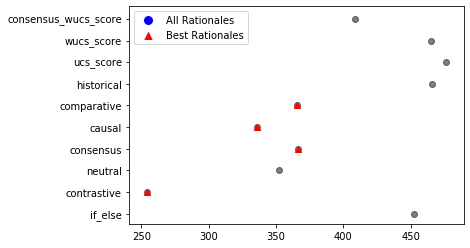

In [136]:
import matplotlib.pyplot as plt

# Assuming rationales and best_rationales are already defined

# First, plot all rationales
for rationale in rationales.columns:
    plt.scatter(rationales[rationale].str.len().mean(), rationale, label=rationale, color='black', alpha=0.5)

# Then, overlay the best rationales with a different color or marker
for rationale in best_rationales:
    plt.scatter(rationales[rationale].str.len().mean(), rationale, label=rationale, color='red', marker='^')

# Displaying a legend may be cluttered if there are many rationales, so consider simplifying or omitting it
# or you can create a custom legend to just show the two groups
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='All Rationales', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='^', color='w', label='Best Rationales', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()

## Unique mean length

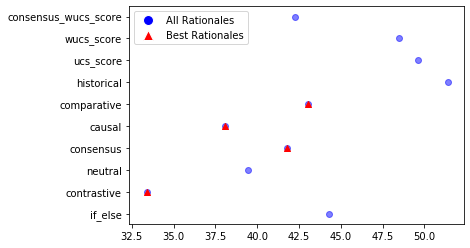

In [137]:
# Function to calculate the average length of unique words for each rationale
def avg_len_unique_words(rationale_series):
    def unique_words_len(text):
        # Split the text into words and get unique words
        unique_words = set(text.split())
        return len(unique_words)

    # Apply the function to each row and then take the mean
    return rationale_series.apply(unique_words_len).mean()

# First, plot all rationales
all_avg_lengths = [avg_len_unique_words(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)
plt.scatter(all_avg_lengths, all_labels, color='blue', alpha=0.5, label='All Rationales')

# Then, overlay the best rationales with a different color or marker
best_avg_lengths = [avg_len_unique_words(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales
plt.scatter(best_avg_lengths, best_labels, color='red', marker='^', label='Best Rationales')

# Create a custom legend to show the two groups
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='All Rationales', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='^', color='w', label='Best Rationales', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()

## Unique bigram 

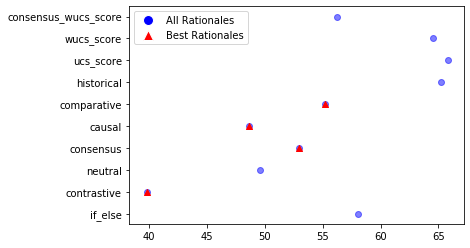

In [138]:
# Function to calculate the average count of unique bigrams for each rationale
def avg_unique_bigrams(rationale_series):
    def unique_bigrams_count(text):
        words = text.split()
        bigrams = {(words[i], words[i+1]) for i in range(len(words)-1)}
        return len(bigrams)

    # Apply the function to each row and then take the mean
    return rationale_series.apply(unique_bigrams_count).mean()

# First, plot all rationales
all_avg_bigrams = [avg_unique_bigrams(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)
plt.scatter(all_avg_bigrams, all_labels, color='blue', alpha=0.5, label='All Rationales')

# Then, overlay the best rationales with a different color or marker
best_avg_bigrams = [avg_unique_bigrams(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales
plt.scatter(best_avg_bigrams, best_labels, color='red', marker='^', label='Best Rationales')

# Create a custom legend to show the two groups
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='All Rationales', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='^', color='w', label='Best Rationales', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()

## unique trigram

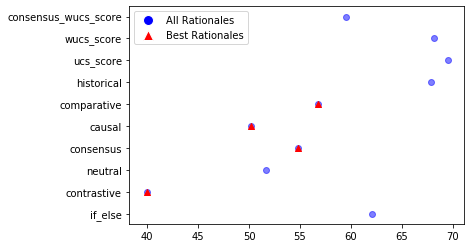

In [139]:
# Function to calculate the average count of unique trigrams for each rationale
def avg_unique_trigrams(rationale_series):
    def unique_trigrams_count(text):
        words = text.split()
        trigrams = {(words[i], words[i+1], words[i+2]) for i in range(len(words)-2)}
        return len(trigrams)

    # Apply the function to each row and then take the mean
    return rationale_series.apply(unique_trigrams_count).mean()

# First, plot all rationales
all_avg_trigrams = [avg_unique_trigrams(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)
plt.scatter(all_avg_trigrams, all_labels, color='blue', alpha=0.5, label='All Rationales')

# Then, overlay the best rationales with a different color or marker
best_avg_trigrams = [avg_unique_trigrams(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales
plt.scatter(best_avg_trigrams, best_labels, color='red', marker='^', label='Best Rationales')

# Create a custom legend to show the two groups
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='All Rationales', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='^', color='w', label='Best Rationales', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()

In [140]:
all_avg_bigrams

[58.05042918454936,
 39.8288626609442,
 49.61534334763949,
 52.92864806866953,
 48.6747138769671,
 55.19510014306152,
 65.21030042918454,
 65.86891988555078,
 64.52628755364807,
 56.197424892703864]

### Sentiment Score: Obtain a sentiment polarity score.

In [142]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


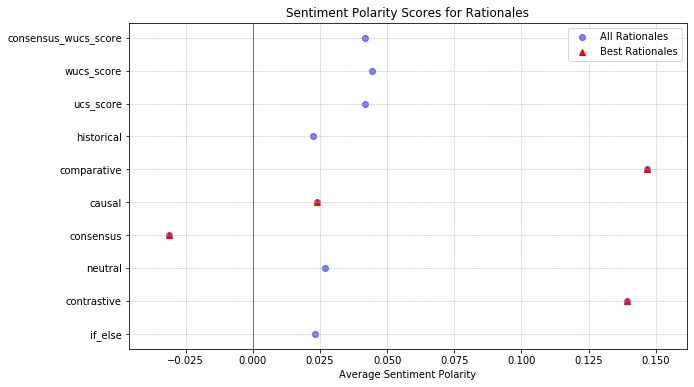

In [144]:
from textblob import TextBlob

# Function to get the sentiment score of a rationale series
def avg_sentiment(rationale_series):
    return rationale_series.apply(lambda text: TextBlob(text).sentiment.polarity).mean()

# Get sentiment scores for all rationales
all_avg_sentiments = [avg_sentiment(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)

# Get sentiment scores for best rationales
best_avg_sentiments = [avg_sentiment(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(all_avg_sentiments, all_labels, color='blue', alpha=0.5, label='All Rationales')
plt.scatter(best_avg_sentiments, best_labels, color='red', marker='^', label='Best Rationales')

plt.xlabel("Average Sentiment Polarity")
plt.title("Sentiment Polarity Scores for Rationales")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


### Lexical Diversity: Calculate the ratio of unique words to the total number of words

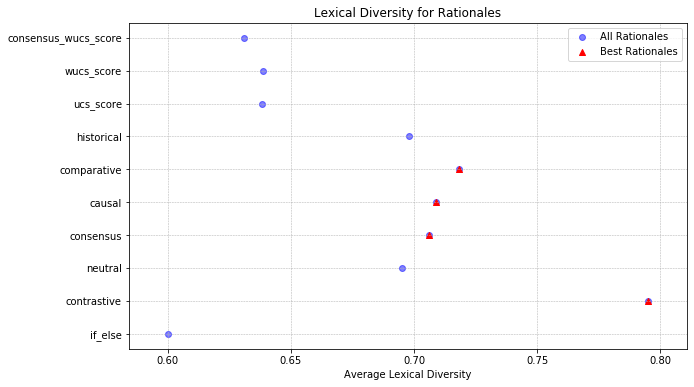

In [145]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

# Function to get the average lexical diversity of a rationale series
def avg_lexical_diversity(rationale_series):
    return rationale_series.apply(lexical_diversity).mean()

# Get lexical diversity scores for all rationales
all_avg_diversities = [avg_lexical_diversity(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)

# Get lexical diversity scores for best rationales
best_avg_diversities = [avg_lexical_diversity(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(all_avg_diversities, all_labels, color='blue', alpha=0.5, label='All Rationales')
plt.scatter(best_avg_diversities, best_labels, color='red', marker='^', label='Best Rationales')

plt.xlabel("Average Lexical Diversity")
plt.title("Lexical Diversity for Rationales")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Named Entity Recognition (NER): Identify the types and frequencies of entities mentioned (e.g., persons, organizations).

In [146]:
!pip install spacy
!python -m spacy download en_core_web_sm


Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/6c/94/6852af0a468b710a042876be3782183646525145b1d5e92a2c3e88b0acf2/spacy-3.7.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/f9/63/49e1eda3c610f49e5d3062e44ed27751f33ca8c4087b100b78b141201a6a/murmurhash-1.0.10-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/5f/70/b9945a7918d467c6c7112f6e20176d4f41

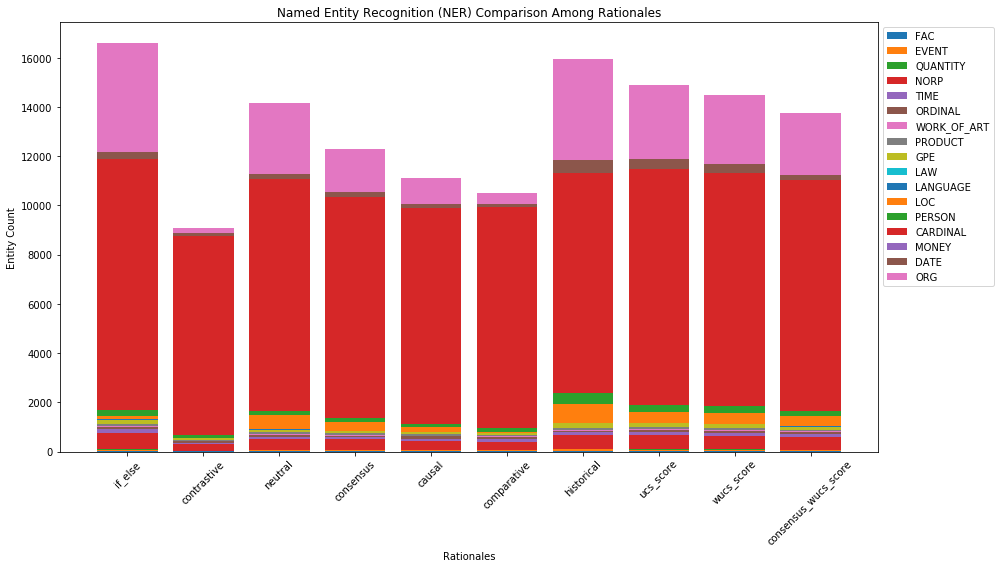

In [149]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Function to count the entities in a list of texts
def count_entities_in_texts(texts):
    entity_counts = Counter()
    
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):  # Only use NER, disable other pipelines for speed
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
            
    return entity_counts

# Store entity counts for each rationale
rationale_entity_counts = {}

for rationale in rationales.columns:
    rationale_texts = rationales[rationale].tolist()
    rationale_entity_counts[rationale] = count_entities_in_texts(rationale_texts)

# Visualization
entity_types = set(ent for counts in rationale_entity_counts.values() for ent in counts.keys())
rationale_labels = list(rationales.columns)

# Creating a 2D array to hold count data
data = np.zeros((len(entity_types), len(rationale_labels)))

for j, rationale in enumerate(rationale_labels):
    for i, entity in enumerate(entity_types):
        data[i, j] = rationale_entity_counts[rationale].get(entity, 0)

# Stacked bar chart
plt.figure(figsize=(14, 8))
bottoms = np.zeros(len(rationale_labels))
for i, entity in enumerate(entity_types):
    plt.bar(rationale_labels, data[i], bottom=bottoms, label=entity)
    bottoms += data[i]

plt.xlabel("Rationales")
plt.ylabel("Entity Count")
plt.title("Named Entity Recognition (NER) Comparison Among Rationales")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
plt.tight_layout()
plt.show()


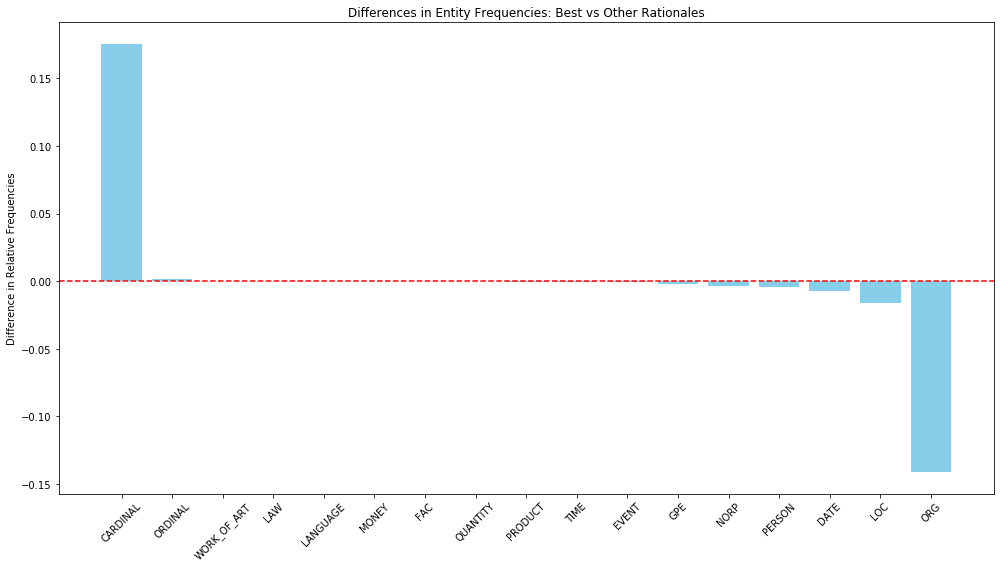

In [150]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Function to count the entities in a list of texts
def count_entities_in_texts(texts):
    entity_counts = Counter()
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):  # Efficiency
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
    return entity_counts

# Calculate entity frequencies for 'best rationales' and 'other rationales'
best_texts = [text for rationale in best_rationales for text in rationales[rationale].tolist()]
best_entity_counts = count_entities_in_texts(best_texts)
total_best = sum(best_entity_counts.values())

other_rationales = set(rationales.columns) - set(best_rationales)
other_texts = [text for rationale in other_rationales for text in rationales[rationale].tolist()]
other_entity_counts = count_entities_in_texts(other_texts)
total_other = sum(other_entity_counts.values())

# Normalize to get relative frequencies
best_frequencies = {entity: count / total_best for entity, count in best_entity_counts.items()}
other_frequencies = {entity: count / total_other for entity, count in other_entity_counts.items()}

# Entities to be considered in the comparison
all_entities = set(best_frequencies.keys()) | set(other_frequencies.keys())

# Plotting
differences = {entity: best_frequencies.get(entity, 0) - other_frequencies.get(entity, 0) for entity in all_entities}

sorted_diff = dict(sorted(differences.items(), key=lambda item: item[1], reverse=True))




/home/huy/miniconda3/envs/huy/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


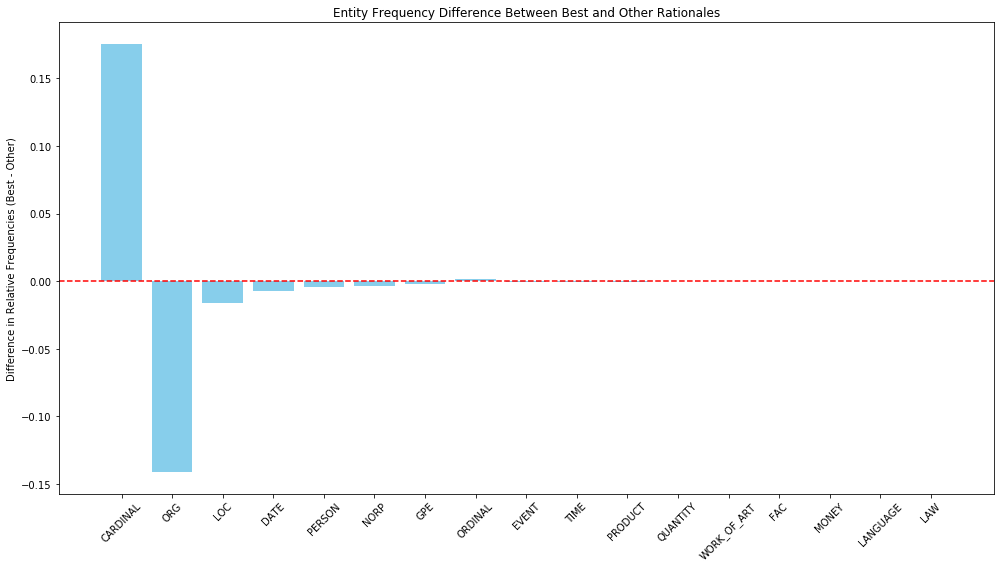

In [152]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Function to count the entities in a list of texts
def count_entities_in_texts(texts):
    entity_counts = Counter()
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):  # Efficiency
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
    return entity_counts

# Calculate entity frequencies for 'best rationales' and 'other rationales'
best_texts = [text for rationale in best_rationales for text in rationales[rationale].tolist()]
best_entity_counts = count_entities_in_texts(best_texts)
total_best = sum(best_entity_counts.values())

other_rationales = set(rationales.columns) - set(best_rationales)
other_texts = [text for rationale in other_rationales for text in rationales[rationale].tolist()]
other_entity_counts = count_entities_in_texts(other_texts)
total_other = sum(other_entity_counts.values())

# Normalize to get relative frequencies
best_frequencies = {entity: count / total_best for entity, count in best_entity_counts.items()}
other_frequencies = {entity: count / total_other for entity, count in other_entity_counts.items()}

# Compute differences
differences = {entity: best_frequencies.get(entity, 0) - other_frequencies.get(entity, 0) for entity in best_frequencies.keys() | other_frequencies.keys()}

# Sort by magnitude of difference for better visualization
sorted_entities = sorted(differences.keys(), key=lambda entity: abs(differences[entity]), reverse=True)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(sorted_entities, [differences[entity] for entity in sorted_entities], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel("Difference in Relative Frequencies (Best - Other)")
plt.title("Entity Frequency Difference Between Best and Other Rationales")
plt.tight_layout()
plt.show()


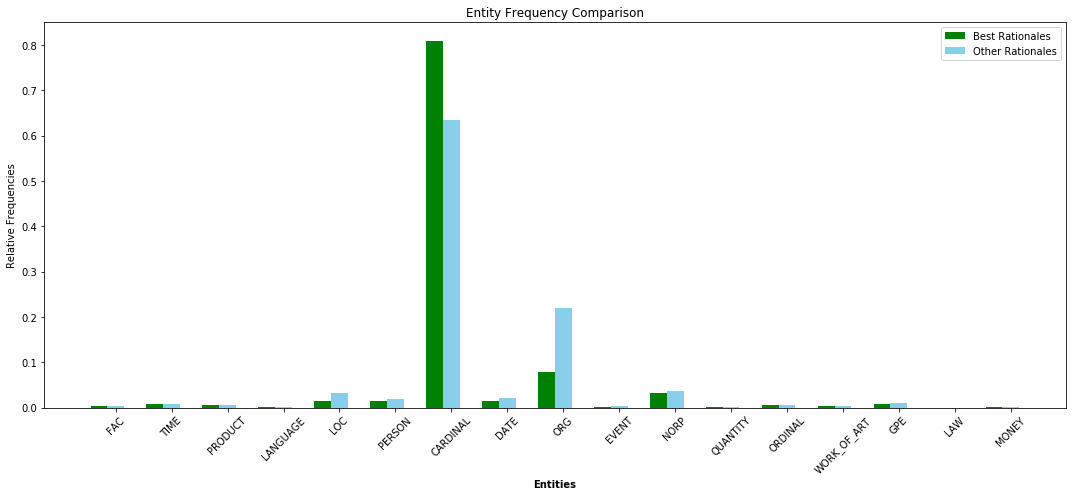

In [153]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Function to count the entities in a list of texts
def count_entities_in_texts(texts):
    entity_counts = Counter()
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
    return entity_counts

# Calculate entity frequencies for 'best rationales'
best_texts = [text for rationale in best_rationales for text in rationales[rationale].tolist()]
best_entity_counts = count_entities_in_texts(best_texts)
total_best = sum(best_entity_counts.values())
best_frequencies = {entity: count / total_best for entity, count in best_entity_counts.items()}

# Calculate entity frequencies for 'other rationales'
other_texts = [text for rationale in other_rationales for text in rationales[rationale].tolist()]
other_entity_counts = count_entities_in_texts(other_texts)
total_other = sum(other_entity_counts.values())
other_frequencies = {entity: count / total_other for entity, count in other_entity_counts.items()}

# Visualization
entities = list(set(best_entity_counts.keys()) | set(other_entity_counts.keys()))
best_vals = [best_frequencies.get(entity, 0) for entity in entities]
other_vals = [other_frequencies.get(entity, 0) for entity in entities]

barWidth = 0.3
r1 = np.arange(len(entities))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(15, 7))
plt.bar(r1, best_vals, width=barWidth, color='green', label='Best Rationales')
plt.bar(r2, other_vals, width=barWidth, color='skyblue', label='Other Rationales')

plt.xlabel('Entities', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(entities))], entities, rotation=45)
plt.ylabel("Relative Frequencies")
plt.title("Entity Frequency Comparison")
plt.legend()

plt.tight_layout()
plt.show()


# Statistical Analysis

In [154]:
import spacy
import numpy as np
from collections import Counter
from textblob import TextBlob

nlp = spacy.load("en_core_web_sm")

def sentiment_scores(texts):
    return [TextBlob(text).sentiment.polarity for text in texts]

def lexical_diversity(texts):
    def trigrams(text):
        return [text[i:i+3] for i in range(len(text) - 2)]
    return [len(set(trigrams(text))) / max(len(trigrams(text)), 1) for text in texts]

def entity_frequencies(texts):
    entity_counts = Counter()
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
    total = sum(entity_counts.values())
    return {entity: count/total for entity, count in entity_counts.items()}


In [155]:
# For high-performing rationales
best_texts = [text for rationale in best_rationales for text in rationales[rationale].tolist()]
best_sentiments = sentiment_scores(best_texts)
best_lexical_diversities = lexical_diversity(best_texts)

# For low-performing rationales
other_texts = [text for rationale in other_rationales for text in rationales[rationale].tolist()]
other_sentiments = sentiment_scores(other_texts)
other_lexical_diversities = lexical_diversity(other_texts)

statistics = {
    'Feature': ['Sentiment', 'Lexical Diversity'],
    'Best Mean': [np.mean(best_sentiments), np.mean(best_lexical_diversities)],
    'Best Variance': [np.var(best_sentiments), np.var(best_lexical_diversities)],
    'Other Mean': [np.mean(other_sentiments), np.mean(other_lexical_diversities)],
    'Other Variance': [np.var(other_sentiments), np.var(other_lexical_diversities)]
}


In [156]:
import pandas as pd

df = pd.DataFrame(statistics)
print(df)


             Feature  Best Mean  Best Variance  Other Mean  Other Variance
0          Sentiment   0.069719       0.020035    0.033369        0.017918
1  Lexical Diversity   0.680805       0.008449    0.592075        0.005738


# Textual Analysis:
Compare the structure, content, and format of high vs. low-performing rationales.

In [158]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /home/huy/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/huy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/huy/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/huy/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /home/huy/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/huy/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [159]:
def avg_sentence_length(texts):
    sentence_lengths = [len(sentence.split()) for text in texts for sentence in TextBlob(text).sentences]
    return sum(sentence_lengths) / len(sentence_lengths)

best_avg_sentence_length = avg_sentence_length(best_texts)
other_avg_sentence_length = avg_sentence_length(other_texts)


Text(0, 0.5, 'Length (words)')

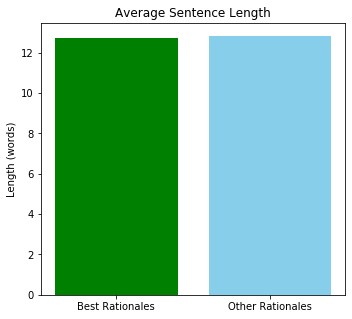

In [160]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(["Best Rationales", "Other Rationales"], [best_avg_sentence_length, other_avg_sentence_length], color=['green', 'skyblue'])
plt.title('Average Sentence Length')
plt.ylabel('Length (words)')

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english', max_features=10)
best_tfidf = vectorizer.fit_transform(best_texts)
best_feature_names = vectorizer.get_feature_names()

vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english', max_features=10)
other_tfidf = vectorizer.fit_transform(other_texts)
other_feature_names = vectorizer.get_feature_names()


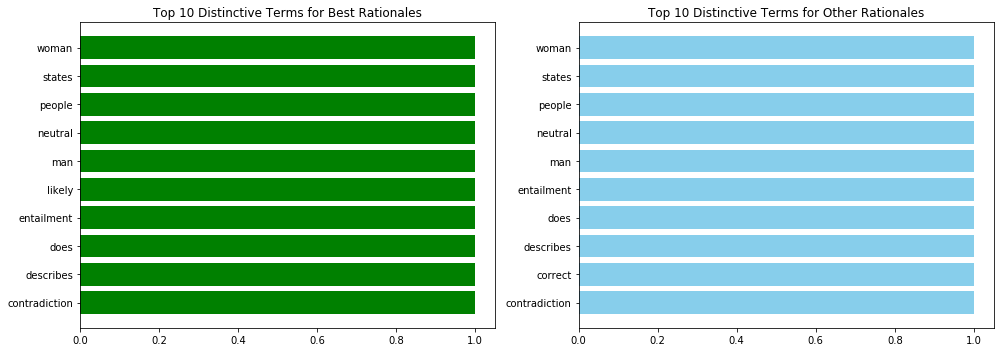

In [163]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.barh(best_feature_names, [1]*10, color='green')  # Here we're just using a count of 1 for visualization purposes
plt.title('Top 10 Distinctive Terms for Best Rationales')

plt.subplot(1, 2, 2)
plt.barh(other_feature_names, [1]*10, color='skyblue')  # Here we're just using a count of 1 for visualization purposes
plt.title('Top 10 Distinctive Terms for Other Rationales')

plt.tight_layout()
plt.show()

In [164]:
def punctuation_usage(texts):
    punctuations = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
    punctuation_counts = Counter()
    for text in texts:
        for char in text:
            if char in punctuations:
                punctuation_counts[char] += 1
    return punctuation_counts

best_punctuations = punctuation_usage(best_texts)
other_punctuations = punctuation_usage(other_texts)

def capitalized_usage(texts):
    return sum(1 for text in texts for word in text.split() if word.isupper())

best_capitals = capitalized_usage(best_texts)
other_capitals = capitalized_usage(other_texts)


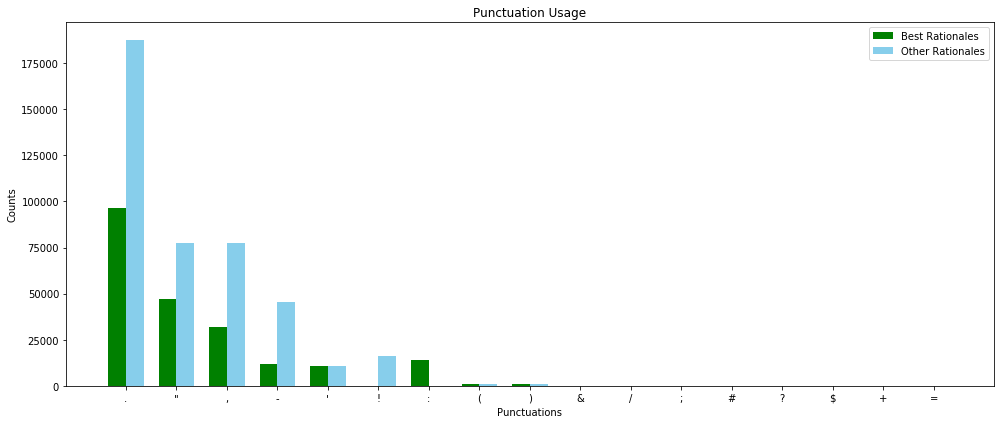

In [165]:
labels, best_vals = zip(*best_punctuations.items())
_, other_vals = zip(*other_punctuations.items())

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(14, 6))
rects1 = plt.bar(x - width/2, best_vals, width, label='Best Rationales', color='green')
rects2 = plt.bar(x + width/2, other_vals, width, label='Other Rationales', color='skyblue')

plt.xlabel('Punctuations')
plt.ylabel('Counts')
plt.title('Punctuation Usage')
plt.xticks(x, labels)
plt.legend()

plt.tight_layout()
plt.show()

# Pattern Identification:
Using clustering or decision tree algorithms to find patterns or rules that distinguish between high and low-performing rationales.

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Merge all rationales into one list and create labels
all_texts = best_texts + other_texts
labels = [1]*len(best_texts) + [0]*len(other_texts)  # Assuming 1 for best and 0 for others

# Convert texts to features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # limiting to top 1000 features for simplicity
X = vectorizer.fit_transform(all_texts).toarray()


In [167]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)  # Limiting depth for simplicity in visualization
clf.fit(X, labels)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

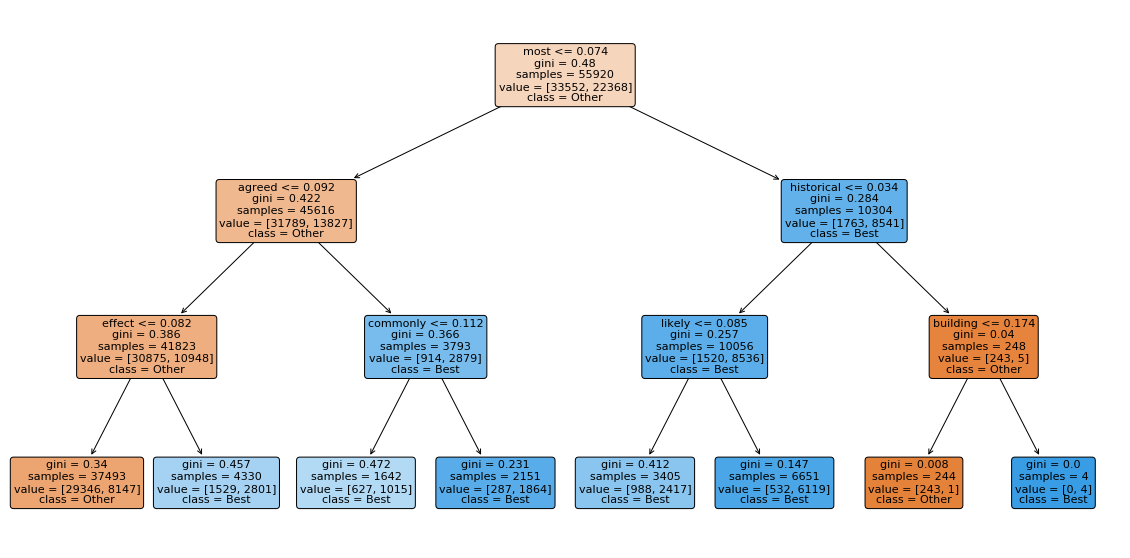

In [169]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names(), class_names=["Other", "Best"], rounded=True)
plt.show()


In [170]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

def preprocess(texts):
    # Tokenize, lowercase, and remove stopwords
    return [word.lower() for text in texts for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]

best_tokens = preprocess(best_texts)
other_tokens = preprocess(other_texts)


In [171]:
best_word_freq = Counter(best_tokens)
other_word_freq = Counter(other_tokens)

# Extracting top 10 most common words for visualization
best_common = best_word_freq.most_common(10)
other_common = other_word_freq.most_common(10)


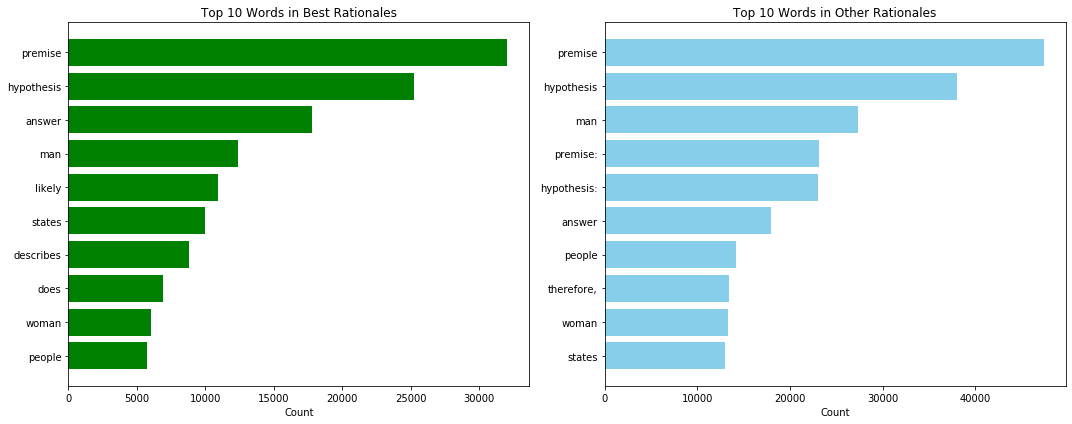

In [172]:
import matplotlib.pyplot as plt

# Extract words and counts for plotting
best_words, best_counts = zip(*best_common)
other_words, other_counts = zip(*other_common)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.barh(best_words, best_counts, color='green')
plt.title('Top 10 Words in Best Rationales')
plt.xlabel('Count')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(other_words, other_counts, color='skyblue')
plt.title('Top 10 Words in Other Rationales')
plt.xlabel('Count')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [173]:
def extract_ngrams(tokens, n):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

best_bigrams = extract_ngrams(best_tokens, 2)
best_trigrams = extract_ngrams(best_tokens, 3)

other_bigrams = extract_ngrams(other_tokens, 2)
other_trigrams = extract_ngrams(other_tokens, 3)


In [174]:
from collections import Counter

best_bigram_freq = Counter(best_bigrams)
best_trigram_freq = Counter(best_trigrams)

other_bigram_freq = Counter(other_bigrams)
other_trigram_freq = Counter(other_trigrams)

# Extracting top 10 most common n-grams for visualization
best_common_bigrams = best_bigram_freq.most_common(10)
best_common_trigrams = best_trigram_freq.most_common(10)

other_common_bigrams = other_bigram_freq.most_common(10)
other_common_trigrams = other_trigram_freq.most_common(10)


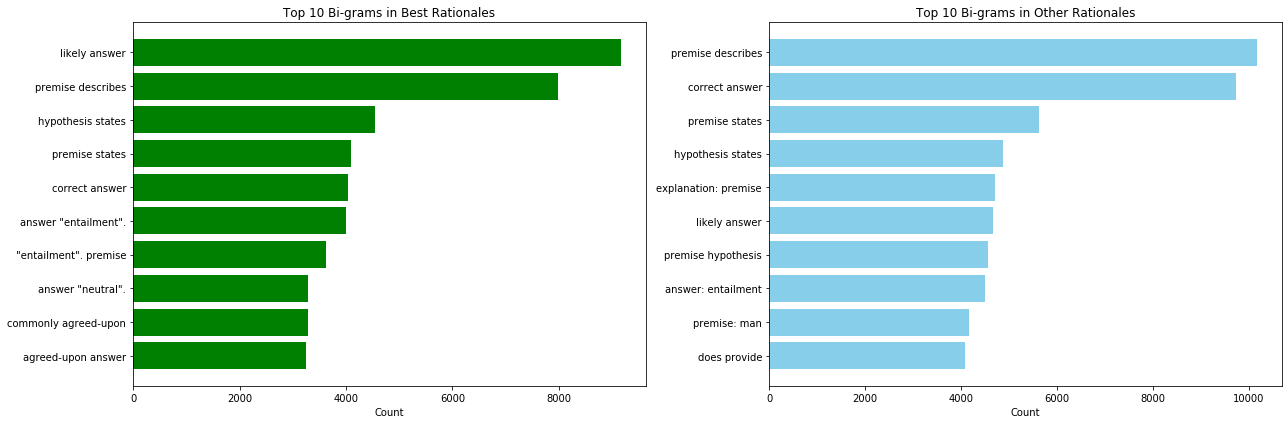

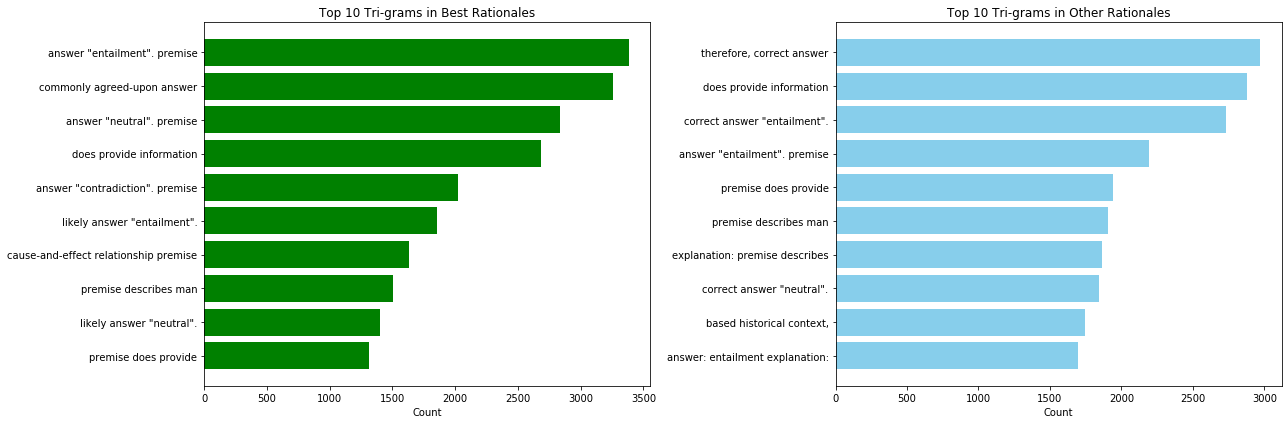

In [175]:
import matplotlib.pyplot as plt

# Bi-grams
best_bigrams, best_bigram_counts = zip(*best_common_bigrams)
other_bigrams, other_bigram_counts = zip(*other_common_bigrams)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.barh(best_bigrams, best_bigram_counts, color='green')
plt.title('Top 10 Bi-grams in Best Rationales')
plt.xlabel('Count')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(other_bigrams, other_bigram_counts, color='skyblue')
plt.title('Top 10 Bi-grams in Other Rationales')
plt.xlabel('Count')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Tri-grams
best_trigrams, best_trigram_counts = zip(*best_common_trigrams)
other_trigrams, other_trigram_counts = zip(*other_common_trigrams)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.barh(best_trigrams, best_trigram_counts, color='green')
plt.title('Top 10 Tri-grams in Best Rationales')
plt.xlabel('Count')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(other_trigrams, other_trigram_counts, color='skyblue')
plt.title('Top 10 Tri-grams in Other Rationales')
plt.xlabel('Count')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [176]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

def pos_tag_text(text):
    tokens = word_tokenize(text)
    return [tag for word, tag in nltk.pos_tag(tokens)]

best_pos_tags = [tag for text in best_texts for tag in pos_tag_text(text)]
other_pos_tags = [tag for text in other_texts for tag in pos_tag_text(text)]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/huy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [177]:
from collections import Counter

best_pos_freq = Counter(best_pos_tags)
other_pos_freq = Counter(other_pos_tags)


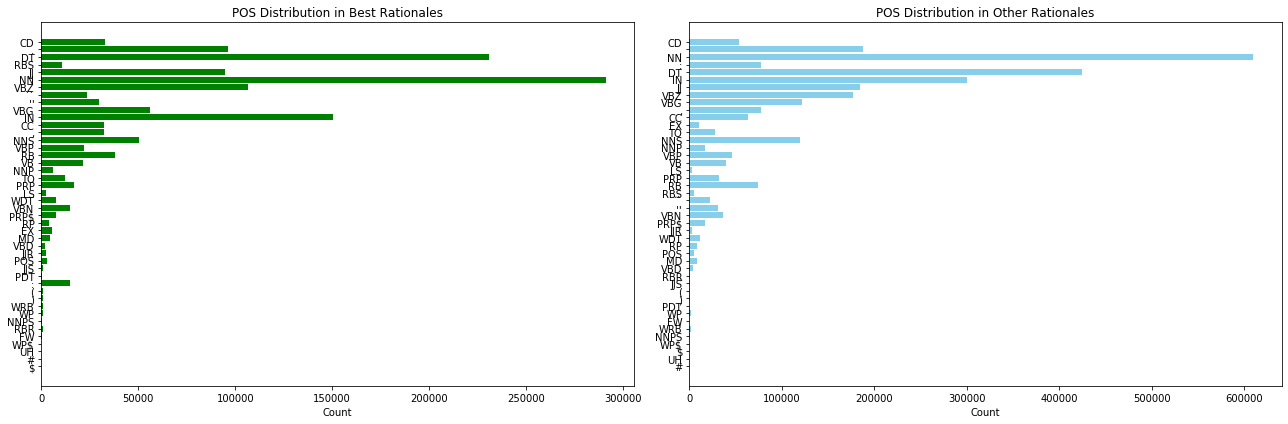

In [178]:
import matplotlib.pyplot as plt

# Extract tags and counts for plotting
best_tags, best_counts = zip(*best_pos_freq.items())
other_tags, other_counts = zip(*other_pos_freq.items())

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.barh(best_tags, best_counts, color='green')
plt.title('POS Distribution in Best Rationales')
plt.xlabel('Count')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(other_tags, other_counts, color='skyblue')
plt.title('POS Distribution in Other Rationales')
plt.xlabel('Count')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
all_texts = best_texts + other_texts
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Split the TF-IDF matrix into best and other rationales
best_tfidf = tfidf_matrix[:len(best_texts)]
other_tfidf = tfidf_matrix[len(best_texts):]


In [180]:
best_mean_tfidf = best_tfidf.mean(axis=0)
other_mean_tfidf = other_tfidf.mean(axis=0)

# Convert to arrays for easy handling
best_mean_tfidf = best_mean_tfidf.A1
other_mean_tfidf = other_mean_tfidf.A1


In [181]:
import numpy as np

best_top_indices = np.argsort(best_mean_tfidf)[-10:]  # Indices of top 10 words for best rationales
other_top_indices = np.argsort(other_mean_tfidf)[-10:]  # Indices of top 10 words for other rationales

best_top_words = [vectorizer.get_feature_names()[i] for i in best_top_indices]
other_top_words = [vectorizer.get_feature_names()[i] for i in other_top_indices]


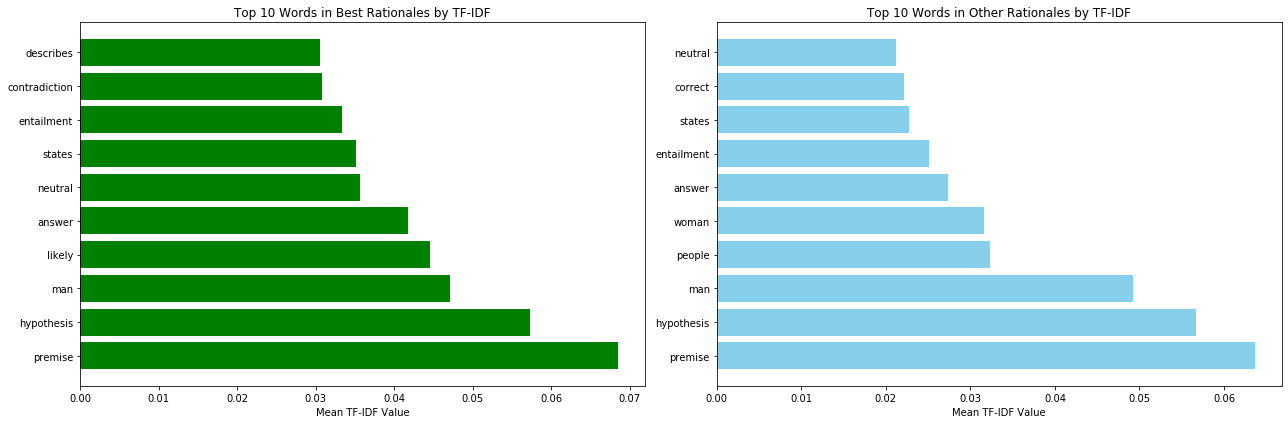

In [182]:
import matplotlib.pyplot as plt

# Plotting the top 10 words for each category by their mean TF-IDF values
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.barh(best_top_words, best_mean_tfidf[best_top_indices], color='green')
plt.title('Top 10 Words in Best Rationales by TF-IDF')
plt.xlabel('Mean TF-IDF Value')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(other_top_words, other_mean_tfidf[other_top_indices], color='skyblue')
plt.title('Top 10 Words in Other Rationales by TF-IDF')
plt.xlabel('Mean TF-IDF Value')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [186]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

best_texts_preprocessed = [preprocess(text) for text in best_texts]
other_texts_preprocessed = [preprocess(text) for text in other_texts]


[nltk_data] Downloading package stopwords to /home/huy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [187]:
best_tokens = [word_tokenize(text) for text in best_texts_preprocessed]
other_tokens = [word_tokenize(text) for text in other_texts_preprocessed]

In [188]:
from collections import defaultdict

def create_co_occurrence_matrix(tokens_list, window_size=2):
    word2id = {}
    id2word = {}
    current_id = 0
    
    co_occurrence_matrix = defaultdict(int)

    for tokens in tokens_list:
        for idx, token in enumerate(tokens):
            i = word2id.setdefault(token, current_id)
            current_id += (i == current_id)

            start_idx = max(0, idx - window_size)
            end_idx = min(len(tokens), idx + window_size + 1)

            for offset in range(start_idx, end_idx):
                if offset != idx:
                    j = word2id.setdefault(tokens[offset], current_id)
                    current_id += (j == current_id)
                    co_occurrence_matrix[(i, j)] += 1

    return co_occurrence_matrix, word2id, id2word

best_co_occurrence, best_word2id, best_id2word = create_co_occurrence_matrix(best_tokens)
other_co_occurrence, other_word2id, other_id2word = create_co_occurrence_matrix(other_tokens)


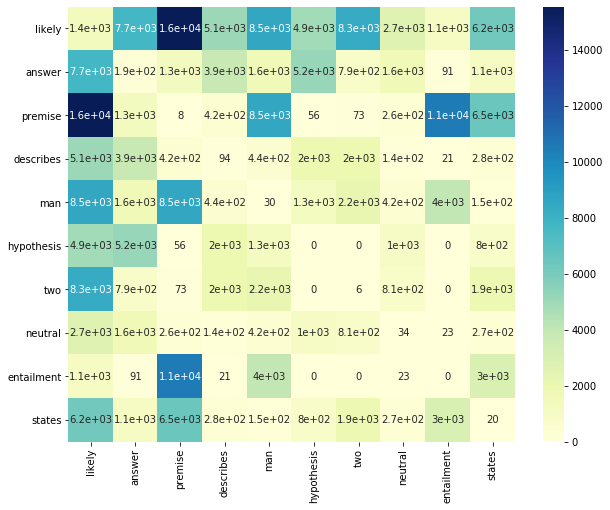

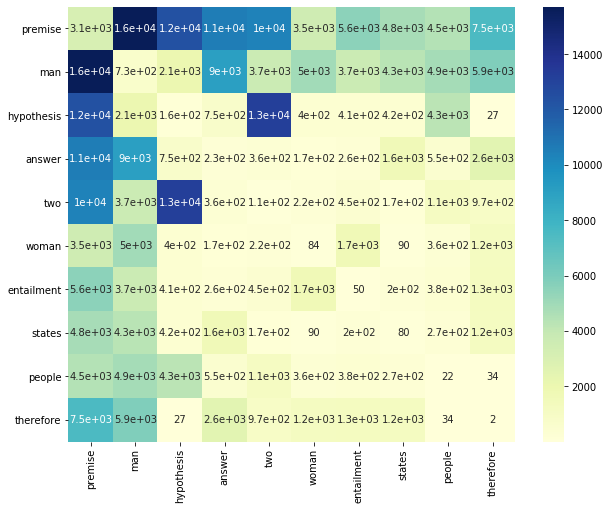

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_co_occurrence(co_occurrence, word2id, top_n=10):
    num_words = len(word2id)
    matrix = np.zeros((num_words, num_words))

    for (i, j), count in co_occurrence.items():
        matrix[i][j] = count

    # Displaying only the top n co-occurring terms for simplicity
    total_counts = np.sum(matrix, axis=1)
    most_frequent_ids = np.argsort(total_counts)[::-1][:top_n]
    matrix = matrix[most_frequent_ids, :][:, most_frequent_ids]
    
    words = [word for word, id_ in word2id.items() if id_ in most_frequent_ids]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", xticklabels=words, yticklabels=words)
    plt.show()

# Visualization
visualize_co_occurrence(best_co_occurrence, best_word2id)
visualize_co_occurrence(other_co_occurrence, other_word2id)


In [190]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

def tokenize_texts(texts):
    sentence_lengths = []
    word_counts = []
    for text in texts:
        sentences = sent_tokenize(text)
        sentence_lengths.append(len(sentences))
        
        words = word_tokenize(text)
        word_counts.append(len(words))
    return sentence_lengths, word_counts

best_sentence_lengths, best_word_counts = tokenize_texts(best_texts)
other_sentence_lengths, other_word_counts = tokenize_texts(other_texts)


[nltk_data] Downloading package punkt to /home/huy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [207]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [214]:
import pandas as pd
import textstat

# Assuming your dataframe is named "rationales"

# Calculate the Flesch Reading Ease for each rationale type
rationale_types = rationales.columns.to_list()
flesch_scores = {}

for r_type in rationale_types:
    scores = rationales[r_type].apply(lambda x: textstat.flesch_reading_ease(x))
    flesch_scores[r_type] = scores


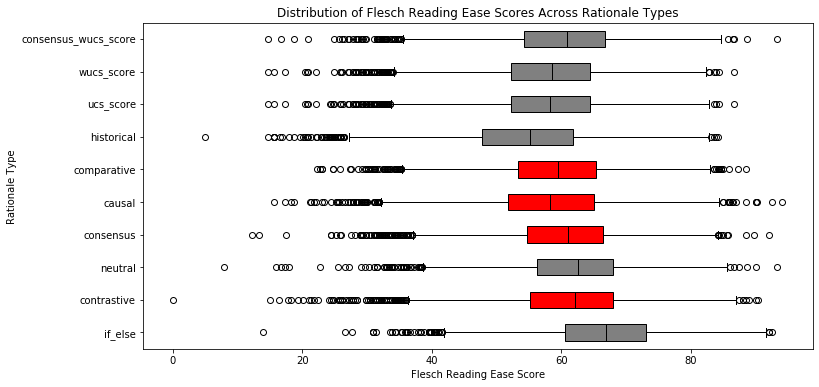

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Box plot can help visualize the distribution
boxprops = dict(facecolor="none")
bp = plt.boxplot([flesch_scores[r_type] for r_type in rationale_types], patch_artist=True, boxprops=boxprops, medianprops=dict(color="black"), vert=0, labels=rationale_types)

# Highlight the best rationales with red
colors = ['red' if r_type in ['comparative', 'causal', 'consensus', 'contrastive'] else 'grey' for r_type in rationale_types]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribution of Flesch Reading Ease Scores Across Rationale Types')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Rationale Type')
plt.show()


In [216]:
rationale_types = rationales.columns.to_list()
# Assuming the other columns 'ucs_score', 'wucs_score', and 'consensus_wucs_score' are not rationale types.

# A dictionary to store the scores for each type
type_scores = {}

for r_type in rationale_types:
    texts = rationales[r_type].tolist()
    sentence_lengths, word_counts = tokenize_texts(texts)
    scores = calculate_flesch(texts, sentence_lengths, word_counts)
    type_scores[r_type] = scores


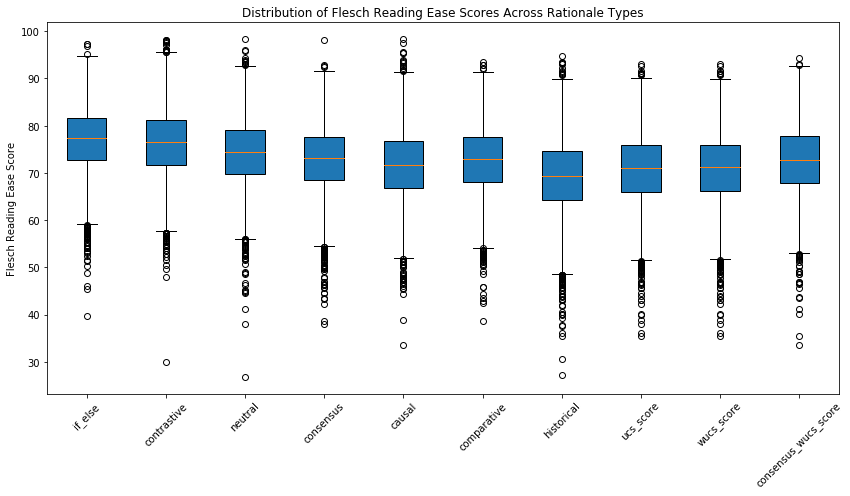

In [218]:
import matplotlib.pyplot as plt

# Extract data for boxplot
labels = list(type_scores.keys())
data = [type_scores[key] for key in labels]

plt.figure(figsize=(12, 7))
plt.boxplot(data, vert=True, patch_artist=True, labels=labels)
plt.title('Distribution of Flesch Reading Ease Scores Across Rationale Types')
plt.ylabel('Flesch Reading Ease Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [220]:
# import spacy

# # Load the English language model
# nlp = spacy.load("en_core_web_sm")

# # Calculate the frequency of dependency relationships
# def dependency_freq(texts):
#     freq = {}
#     for text in texts:
#         doc = nlp(text)
#         for token in doc:
#             freq[token.dep_] = freq.get(token.dep_, 0) + 1
#     return freq

# rationale_types = rationales.columns.to_list() 
# dep_freqs = {r_type: dependency_freq(rationales[r_type]) for r_type in rationale_types}


KeyboardInterrupt: 

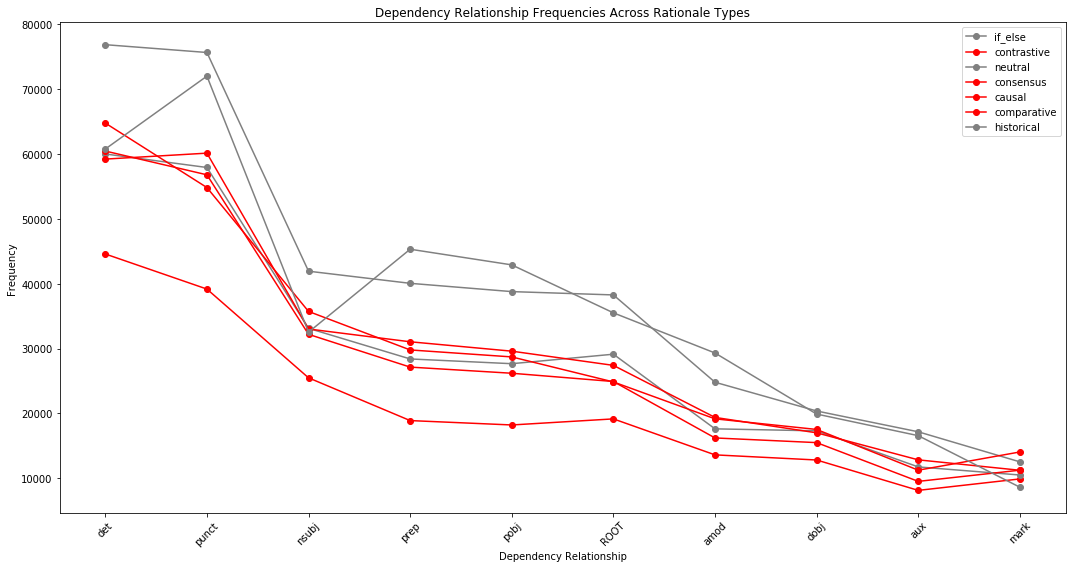

In [ ]:
import matplotlib.pyplot as plt

# Let's consider the top 10 most common dependency relationships for visualization
top_deps = sorted({dep for freq in dep_freqs.values() for dep in freq.keys()}, key=lambda dep: sum(freq.get(dep, 0) for freq in dep_freqs.values()), reverse=True)[:10]

plt.figure(figsize=(15, 8))

for r_type, freq in dep_freqs.items():
    if r_type in ['comparative', 'causal', 'consensus', 'contrastive']:
        plt.plot(top_deps, [freq.get(dep, 0) for dep in top_deps], label=r_type, marker='o', color='red')
    else:
        plt.plot(top_deps, [freq.get(dep, 0) for dep in top_deps], label=r_type, marker='o', color='grey')

plt.title('Dependency Relationship Frequencies Across Rationale Types')
plt.ylabel('Frequency')
plt.xlabel('Dependency Relationship')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [221]:
!pip install gensim


Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/d3/e2/17bad124c8dd2aa0a3062e44992eb34c282379450ebbe6fdb6b96aa3c907/gensim-4.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 9.1 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [223]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

rationale_cleaned_data = {col: [clean(rationale) for rationale in rationales[col] if isinstance(rationale, str)] for col in rationales.columns}


In [225]:
# LDA = gensim.models.ldamodel.LdaModel

# def get_lda_topics(rationale_data):
#     doc_clean = [data.split() for data in rationale_data]
#     dictionary = corpora.Dictionary(doc_clean)
#     doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
#     lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100, chunksize=1000, passes=50)
#     return lda_model.print_topics(num_words=5)

# rationale_topics = {col: get_lda_topics(data) for col, data in rationale_cleaned_data.items()}


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

for col, topics in rationale_topics.items():
    plt.figure(figsize=(10,6))
    for i, topic in topics:
        words = topic.split("+")
        topic_words = [word.split("*")[1] for word in words]
        weights = [float(word.split("*")[0]) for word in words]
        
        color = 'red' if col in ['comparative', 'causal', 'consensus', 'contrastive'] else 'grey'
        plt.barh(topic_words, weights, color=color)
        
    plt.title(f"Top Words for {col} Rationales")
    plt.show()


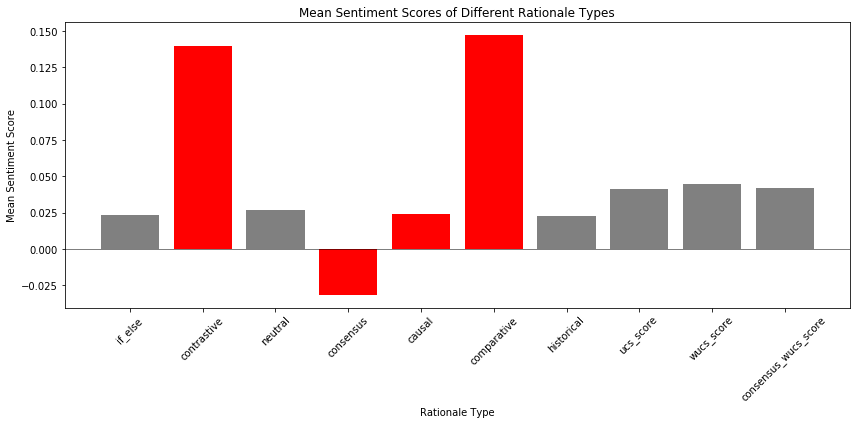

In [226]:
from textblob import TextBlob

# Compute sentiment scores for each rationale type
sentiment_scores = {}
for col in rationales.columns:
    sentiments = [TextBlob(str(rationale)).sentiment.polarity for rationale in rationales[col]]
    sentiment_scores[col] = sentiments

# Plotting the sentiment scores
plt.figure(figsize=(12, 6))
colors = ['red' if col in ['comparative', 'causal', 'consensus', 'contrastive'] else 'grey' for col in rationales.columns]
means = [np.mean(sentiment_scores[col]) for col in rationales.columns]
plt.bar(rationales.columns, means, color=colors)
plt.xlabel('Rationale Type')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Scores of Different Rationale Types')
plt.axhline(y=0, color='black',linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [227]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase, remove punctuation and stopwords
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

all_rationales = []
for col in rationales.columns:
    all_rationales.extend(rationales[col].apply(preprocess_text))


In [228]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=all_rationales, vector_size=100, window=5, min_count=1, workers=4)
model.train(all_rationales, total_examples=len(all_rationales), epochs=10)


(14766194, 19693670)

In [229]:
def average_word_vector(rationale, model):
    return np.mean([model.wv[word] for word in rationale if word in model.wv.index_to_key], axis=0)

averaged_vectors = {}
for col in rationales.columns:
    averaged_vectors[col] = rationales[col].apply(lambda x: average_word_vector(preprocess_text(x), model))


KeyboardInterrupt: 

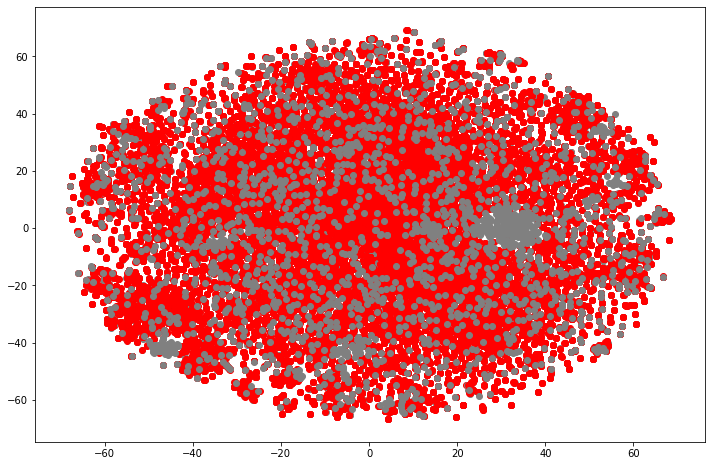

In [230]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# all_vectors = []
# labels = []
# colors = []

# for col, vectors in averaged_vectors.items():
#     all_vectors.extend(vectors)
#     labels.extend([col for _ in range(len(vectors))])
#     col_color = 'red' if col in ['comparative', 'causal', 'consensus', 'contrastive'] else 'grey'
#     colors.extend([col_color for _ in range(len(vectors))])

# # t-SNE transformation
# tsne = TSNE(n_components=2, random_state=0)
# transformed_data = tsne.fit_transform(all_vectors)

# # Visualization
# plt.figure(figsize=(12, 8))
# for i, label in enumerate(labels):
#     plt.scatter(transformed_data[i, 0], transformed_data[i, 1], color=colors[i], label=label if i == labels.index(label) else "")
# plt.legend(loc='upper right')
# plt.title('t-SNE visualization of rationale embeddings')
# plt.show()


In [260]:
patterns = {
    "starts_with_based_on": r"^Based on",
    "contains_question": r"\?",
    "mentions_data": r"\bdata\b",
    "mentions_evidence": r"\bevidence\b",
    "mentions_answer": r"\banswer\b",
    "mentions_conclusion": r"\bconclusion\b",
    "mentions_reason": r"\breason\b",
    "mentions_support": r"\bsupport\b",
    "mentions_supporting": r"\bsupporting\b",
    "mentions_supports": r"\bsupports\b",
    "mentions_premise": r"\bpremise\b",
    "mentions_hypothesis": r"\bhypothesis\b",
    "mentions_both_premise_and_hypothesis": r'Premise:\s(.*?)\sHypothesis:\s(.*?)$',
    "mentions_correct": r"\bThe correct answer is\b",
    # ... add more as you identify them
}


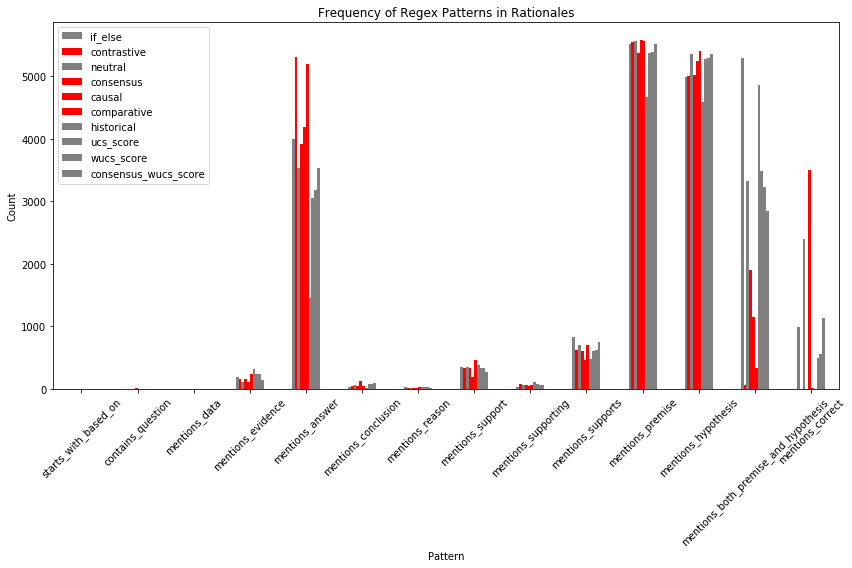

In [261]:
import matplotlib.pyplot as plt
import re

results = {}

for name, pattern in patterns.items():
    matches = rationales.applymap(lambda x: bool(re.search(pattern, str(x), re.DOTALL)))
    results[name] = matches.sum()

# Visualize
df_results = pd.DataFrame(results)
df_results = df_results.transpose()
df_results.columns = rationales.columns

colors = ["red" if col in ['comparative', 'causal', 'consensus', 'contrastive'] else 'grey' for col in df_results.columns]

df_results.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title("Frequency of Regex Patterns in Rationales")
plt.ylabel("Count")
plt.xlabel("Pattern")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
